<a href="https://colab.research.google.com/github/morreh89/Moringa_IP/blob/master/%22Moringa_Data_Science_Core_W2_Independent_Project_2020_08_Maurice_Kimanzi_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a)Defining the Question 
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Having a bank account has been considered to be one of goals to financial inclusion towards in Africa. In this project we are going to Figure out how we can predict which individuals are most likely to have or use a bank account ?




Our solution will help indicate the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda while providing insights into some of the key demographic components that might drive individuals’ financial outcomes.

b) Specifying the Data Analytic Question
FORMULATED HYPOTHESIS
Null Hypothesis(Ho):
The condition that an individual has a bank account is dependent on the type of location, Marital status, cell phone, Level of Education, Type of Job, Respondent Age, and gender of the respondent.

Alternative Hypothesis(H1):
Having a bank account is not associated with the type of location, Marital status, cell phone, Level of Education and Type of Job, Respondent Age, and gender of the respondent

c) Defining the Metric for Success
Find out parameters that will tell whether an individual has a bank account or not. We shall reject the hypothesis if the P-value is less than the significance value or not reject the hypothesis if the P-value is greater than the significance level. It will be compared with the crical value to determine it. We shall also calculate the PCA  to determine whether the model prediction will have an accuracy level of more than 85%. To attain the measurement of accuracy, we shall divide the population into a training sample and a test sample.

Data Relevance
Here we get to import libraries that will be used in this analysis



In [22]:
#Import libraries

# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Seaborn
import seaborn as sns
anomalies = []
import seaborn as sb
# importing linear regression from sci kit learn
from sklearn.linear_model import LinearRegression

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
# importing random module
# we will use random.sample() function to return a k length 
# list of unique elements chosen from our population
import random

!pip install --user -q pandas-profiling  


**Reading our Dataset**

In [3]:
#Loading the Data from the source
#defination= http://bit.ly/VariableDefinitions 
#Dataset=http://bit.ly/FinancialDataset 
# our datasframe will be called (df)
# the first dataframe is called defination and this defines  what column names  mean in our dataset.
definations= pd.read_csv("http://bit.ly/VariableDefinitions")
df= pd.read_csv("http://bit.ly/FinancialDataset")
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Determining the no. of records in our dataset
# in this code we want to find the number of raws and the number of columns in our dataset.
# the dataset has 23524 raws and 13 columns.
df.shape

(23524, 13)

In [7]:
# Previewing the top of our dataset
#In the dataset difination we get to explore what the column names really mean in our main dataset
#example of what a column and  explanation is age of repondent, this means the "age_of_respondent" represents "The age of the interviewee"
definations

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [8]:
# converting categorical data to numerical data
# Under has a bank account yes is converted to 1 while No is converted to 0(binary)

df['Has a Bank account']=df['Has a Bank account'].map({'No':0, 'Yes':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
# converting categorical data to numerical data
# Under Type of Location Urban is converted to 1 while Rural  is converted to 0 (binary)
df['Type of Location']=df['Type of Location'].map({'Rural':0, 'Urban':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,0.0,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,0.0,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,1.0,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,0.0,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,1.0,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
#converting categorical data  numerical data
#Under cell phone access yes is converted to 1 while No is converted to 0

df['Cell Phone Access']=df['Cell Phone Access'].map({'No':0, 'Yes':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,0.0,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,0.0,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,1.0,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,0.0,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,1.0,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# converting categorical data  numerical data
# Under gender Male is converted to 1 while Female is converted to 0

df['gender_of_respondent']=df['gender_of_respondent'].map({'Female':0, 'Male':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,0.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,1.0,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,0.0,1.0,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,1.0,0.0,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [12]:
#Checking whether each column has an appropriate datatype
#Some of the data type that we have in this dataset are intergers,objects and floats
# 6 columns have object, 6 columns have floats and 1 column has intergers 
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account        float64
Type of Location          float64
Cell Phone Access         float64
household_size            float64
Respondent Age            float64
gender_of_respondent      float64
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [13]:
# checking sum of null missing values in each column
# each column has  missing values appart from only 2 column and  that is year and uniqueid

df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#checking the profile of our dataset
#We are curious to know a summary of our dataset and may not be limited  to
#missing values in a column, how are the features co-related? What is the max, min, or outlier in the data?
#what insights can one get when we plot and Visualize this data and see the details.

#There are functions available in Pandas to get that insight like describe, info, etc. 
#but those are pretty basics and with the help of Data Visualization tools like matplotlib, seaborne, and plotly we can plot the visualization as well.


#Documentation Following Statistics is generated for each of the columns:

#Essentials: type, unique values, missing values
#Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
#Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
#Most frequent values Histogram
#Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes



import pandas_profiling


pandas_profiling.ProfileReport(df)





# External Data Source Validation
Making sure our data matches something outside of the dataset is very important. It allows you to ensure that the measurements of variables are roughly in line with what they should be and it serves as a check on what other things might be wrong in our dataset. Doing External validation can often be as simple as checking your data against a single number, as we will do here.




In [24]:
# in this code  we are aiming to findout the type of unique values we have in each column.
#printing all the uniques values in the country column

print(df.country.unique())

#printing all the uniques values in the Has a Bank account column

print(df['Has a Bank account'].unique())

#printing all the uniques values in the year column


print(df['year'].unique())
#printing all the uniques values in the of location column

print(df['Type of Location'].unique())
#printing all the uniques values in the unified column

print(df['uniqueid'].unique())
#printing all the uniques values in the cell phone column

print(df['Cell Phone Access'].unique())
#printing all the uniques values in the household column

print(df['household_size'].unique())

#printing all the uniques values in the respondent age column

print(df['Respondent Age'].unique())
#printing all the uniques values in the gender of respondent column

print(df['gender_of_respondent'].unique())
#printing all the uniques values in the   The relation with head column

print(df['The relathip with head'].unique())
#printing all the uniques values in the marital status column

print(df['marital_status'].unique())
#printing all the uniques values in the marital status column
print(df['Level of Educuation'].unique())
#printing all the uniques values in the type of job column

print(df['Type of Job'].unique())

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
[ 1.  0. nan]
[2018 2029 2056 2016 2039 2017]
[ 0.  1. nan]
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
[ 1.  0. nan]
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
[ 0.  1. nan]
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]
['Secondary education' 'No formal education'
 'Vocation

# Tidying the dataset
Tidy data is a standard way of mapping the meaning of a dataset to its structure.

In this section we purpose to remove the null values in our data set , check for outliers, drop unnessecary columns.

In [25]:
#dealing with missing values
# Since we noted that our dataset contained null values , this is the point where we act on them. 
# here   we deal with them by  dropping all of them
df=df.dropna()
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [26]:
# Dropping column
# The reason why we are dropping this column is bacause  we feel that  it adds no values toward our analysis as we predict our model
dfdrop=df.drop('uniqueid',axis=1)
dfdrop.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0.0,0.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent


In [37]:
#renaming  columns from the dataset
#it was important for me to rename my column since others contained mispelled works,
#This was to avoid errors while running codes due to mispelled columns.
#after we rename our column we define our datraset  to df
df0=dfdrop.rename(columns={'Respondent Age': 'respondent_age','Has a Bank account':'bank_account','Type of Location':'type_of_location','Cell Phone Access':'cell_phone_access','gender_of_respondent':'gender'	
                         ,'The relathip with head':'relationship_with_head','Level of Educuation':'level_of_education', 'Type of Job': 'type_job'})

df0.head(2)

,country,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender,relationship_with_head,marital_status,level_of_education,type_job
0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0.0,0.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent


In [38]:
# After  cleaning our dataframe df we  export it  csv file called df. This helps us to keep the changes perment and avoid rerunning the dataframe again and again
df0.to_csv('df.csv')

In [39]:
df=pd.read_csv('df.csv')
df.head(1)

,Unnamed: 0,country,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender,relationship_with_head,marital_status,level_of_education,type_job
0,0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed


In [40]:
df.columns


Index(['Unnamed: 0', 'country', 'year', 'bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age', 'gender',
       'relationship_with_head', 'marital_status', 'level_of_education',
       'type_job'],
      dtype='object')

In [68]:
# Dropping all null values in our dataframe

df.dropna(inplace = True)

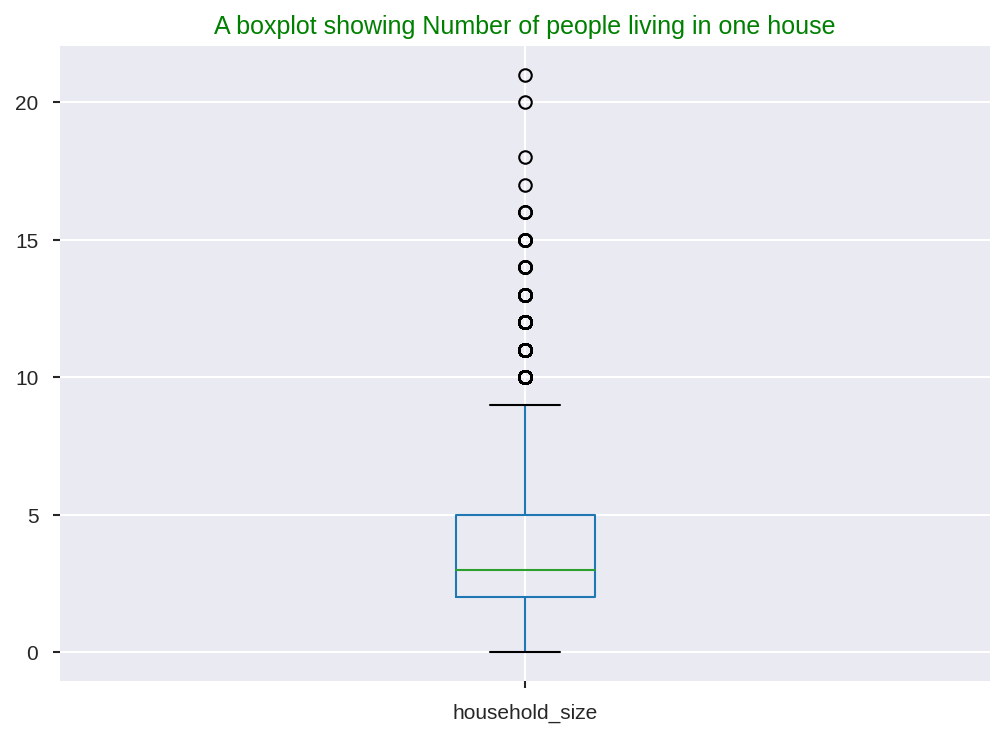

In [71]:

# checking for outliers on the variable (Household_size) using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 150)
df.boxplot(['household_size'])
plt.title("A boxplot showing Number of people living in one house", color = 'green')
plt.show()


# the boxplot shows that there are outliers

In [74]:
# IQR Score 
# ---
# The IQR score uses the IQR scores to remove the outliers. 
# The rule of thumb is that anything not in the range of 
# (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
# ---
# Something to note about outlier methods is that they are likely to yield 
# different results due to the fact that they use different techniques (criteria) 
# for outlier detection
# ---
#

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df1'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)


(19490, 13)
(23343, 13)


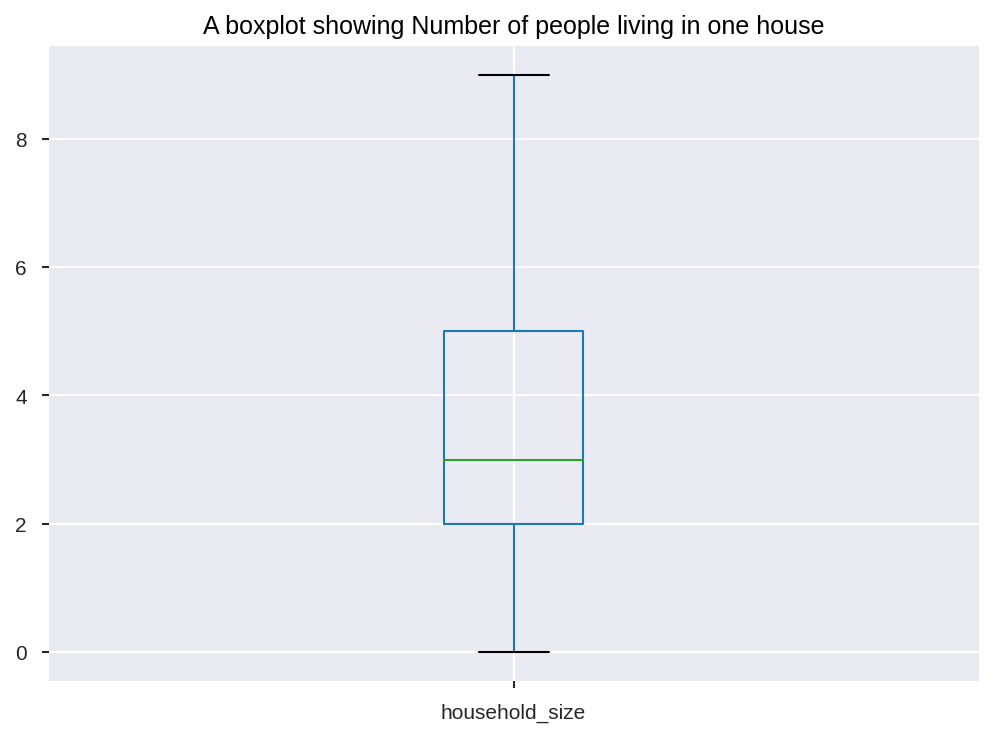

In [78]:

# checking for outliers on the variable (Household_size) using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 150)
df1.boxplot(['household_size'])
plt.title("A boxplot showing Number of people living in one house", color = 'black')
plt.show()


# the boxplot shows that there are no outliers

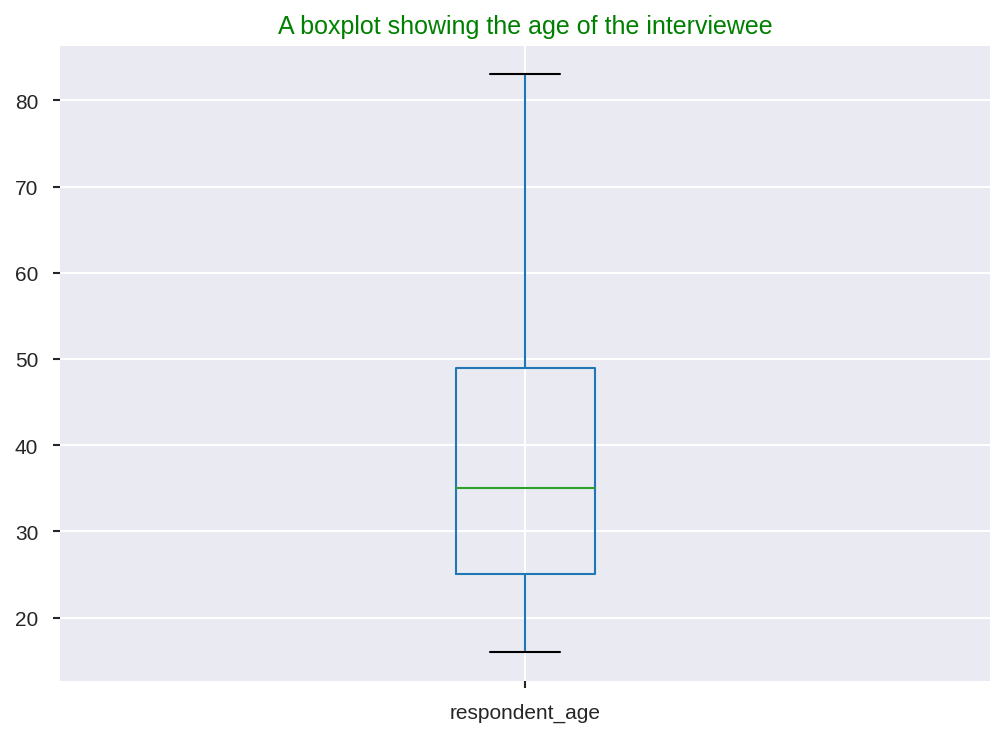

In [83]:
# checking for outliers on the variable (respondent_age) using boxplot


# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart


plt.figure(dpi = 150)
df1.boxplot(['respondent_age'])
plt.title("A boxplot showing the age of the interviewee", color = 'green')
plt.show()


# the boxplot shows that there are no outliers

# Dealing with Anomalies

In [85]:
# From the profile report we saw that the year column had anomalies (2029,2059,2039)

# the data description of the year column (Year survey was done in) only included(2016,2017,2018)

yr= df1[df1['year']>2019].index
df1.drop(yr,inplace=True)
df1.year.unique()




/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([2018, 2016, 2017])

# Exploratory Data Analysis
Univariate Analysis

It is a section where we get to explore one variable at a time. Here we get to calculate the central tendency, Measures of Dispersion/ Variability/ Spread e.g standard deviation, correlation, and kurtosis., We also do Visualisation Techniques by using pie charts, and histogram

# Measures of Central Tendency

In [86]:
# finding out the mean of the numerical variables
#a number around which a whole data is spread out. 
# In a way, it is a single number of household size and respondent age which can estimate the value of whole data set.

print (df1['household_size'].mean())
print (df1['respondent_age'].mean())

3.5999486916367367
38.18296562339661


In [87]:
# finding out the median
# Median is the value which divides the data in 2 equal parts i.e. number of terms on right side of it 
# is same as number of terms on left side of it when data is arranged in either ascending or descending order in both household size and respondent age.

print (df1['household_size'].median())
print (df1['respondent_age'].median())

3.0
35.0


In [88]:
#finding the  mode
# Mode is the term appearing maximum time in both household size and respondent age i.e. term that has highest frequency.

print (df1['household_size'].mode())
print (df1['respondent_age'].mode())

0    2.0
dtype: float64
0    30.0
dtype: float64


In [89]:
# finding out the mode
#The most apperaing year is  2016
df1['year'].mode()

0    2016
dtype: int64

In [90]:
# This section describe a brief statistical analysis in our data

df1.describe()

,Unnamed: 0,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender
count,19490.000000,19490.000000,19490.0,19490.000000,19490.000000,19490.000000,19490.000000,19490.000000
mean,12153.880144,2016.928168,0.0,0.374295,0.710262,3.599949,38.182966,0.387173
std,6649.533648,0.834238,0.0,0.483953,0.453652,2.087395,16.088908,0.487116
min,1.000000,2016.000000,0.0,0.000000,0.000000,0.000000,16.000000,0.000000
25%,6641.250000,2016.000000,0.0,0.000000,0.000000,2.000000,25.000000,0.000000
50%,12284.500000,2017.000000,0.0,0.000000,1.000000,3.000000,35.000000,0.000000
75%,17860.750000,2018.000000,0.0,1.000000,1.000000,5.000000,49.000000,1.000000
max,23522.000000,2018.000000,0.0,1.000000,1.000000,9.000000,83.000000,1.000000


# Measures of Dispersion/ Variability/ Spread

In [91]:
# since our population  had 23340 raw  we decided to take a sample of 1000 raws and work with it
# the sample is randomly generated from the main population.
# Determining the size
#print(df1.shape
# previewing dataset

## Selecting the sample

df1_sample = df1.sample(n=1000)
print(df1_sample)

       Unnamed: 0   country  ...   level_of_education              type_job
15088       15143  Tanzania  ...   Tertiary education         Self employed
6858         6862    Rwanda  ...    Primary education   Informally employed
3831         3835     Kenya  ...    Primary education         Self employed
22319       22494    Uganda  ...  No formal education         Self employed
5406         5410     Kenya  ...    Primary education         Self employed
...           ...       ...  ...                  ...                   ...
7914         7921    Rwanda  ...  No formal education  Government Dependent
3311         3315     Kenya  ...  Secondary education  Remittance Dependent
19527       19686  Tanzania  ...    Primary education         Self employed
12194       12201    Rwanda  ...    Primary education   Informally employed
374           374     Kenya  ...  Secondary education  Remittance Dependent

[1000 rows x 13 columns]


In [92]:
# calculating the mean of the sample population
print(df1_sample["household_size"].mean())
print(df1_sample["respondent_age"].mean())

3.501
37.418


In [93]:
# Finding the standard deviation
#That is, how household_size and respondent_age are  spread out from mean. A low standard deviation indicates that the data points 
# tend to be close to the mean of the data set, while a high standard deviation indicates that the 
# data points are spread out over a wider range of values.
# There are situations when we have to choose between sample or population Standard Deviation. 
# When we are asked to find SD of some part of a population, a segment of population; 
# then we use sample Standard Deviation. But when we have to deal with a whole population, 
# then we use population Standard Deviation. As you know, in descriptive statistics, 
# we generally deal with a data available in a sample, not in a population.

df1_sample.std()
#our sample size standard deviation is as  shown below.
#Based on the results we have we can say that respondent age is highly spread from the mean which is 38.18296562339661

Unnamed: 0           6529.566200
year                    0.823769
bank_account            0.000000
type_of_location        0.486362
cell_phone_access       0.439943
household_size          2.051392
respondent_age         15.484284
gender                  0.488661
dtype: float64

In [94]:
# variance is square root of the std.It  will help us to measure how dispersed our data is

#If our data  has a variance  of zero, it will mean that every number of it is the same but if we will get higher variance and mosr so a variace  higher the mean
# it will mean that  the our data had  dis-similarities.Considering  our mean as  the center of reference we will see how the the data is  scattered


# Finding the variance of the herbicide average prices
df1_sample.var()
# dased on the results we can conclude  and say that: the household size  is slightly  dispered but comparing  it with the respondent age  we can say that the 
# the respondent age highly scattered.

Unnamed: 0           4.263523e+07
year                 6.785946e-01
bank_account         0.000000e+00
type_of_location     2.365475e-01
cell_phone_access    1.935495e-01
household_size       4.208207e+00
respondent_age       2.397630e+02
gender               2.387898e-01
dtype: float64

In [95]:
# Finding the range  helps us to know the difference between the maximum point and the minimum point
print(df1_sample["household_size"].max() - df1_sample["household_size"].min())



print(df1_sample["respondent_age"].max() - df1_sample["respondent_age"].min())

9.0
66.0


In [96]:

# In statistics and probability, quartiles are values that divide your data into quarters provided data is sorted in an ascending order. 
# There are three quartile values. First quartile value is at 25 percentile. 
# Second quartile is 50 percentile and third quartile is 75 percentile. 
# Second quartile (Q2) is median of the whole data. First quartile (Q1) is median of upper half of the data. 
# And Third Quartile (Q3) is median of lower half of the data.
# ---
print(df1["respondent_age"].quantile([0.25,0.5,0.75]))
print(df1["household_size"].quantile([0.25,0.5,0.75]))

0.25    25.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [97]:

# In Skewness  we are interested to  measure  the asymmetry of the probability distribution of our data
# we expect our skwness  value to be either  a positive or negative, or undefined.
# If we get that distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
# it will  mean that mean is less than the mode. This situation is also called negative skewness.
#If our distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# This will mean that the  mean is greater than the mode. This situation  will  be  called positive skewness.

print(df1['respondent_age'].skew())
print(df1['household_size'].skew())
#In both households and respndent we have  distribution  positive skewed value and so we can conclusively say that the distibution is skewed to the right ,meaning that mean is greater than the mode

0.7322247623001589
0.6078989611800999


In [98]:

#Kurtosis  measures  the heaviness of tail in any given data.
# since our data contained outliers we except to have a heavy tail because this how  outliers can be manifested
#in comparision with the normal distribution.

print(df1["household_size"].kurt())
print(df1["respondent_age"].kurt())
# In both variables,kurtosis is greater than zero, then the distribution has heavier tails and is called 
#a leptokurtic distribution.
#In Household size variable,the kurtosis was 1.154, while in respondent age was 0.09
# this indicated that household size had thicker and heavier in tail compared to respondent age 
#which had a kurtosis of close to zero(0.09)

-0.5109224950583036
-0.2948366760725136


In [100]:
df1.groupby('bank_account')['household_size'].sum()


bank_account
0.0    70163.0
Name: household_size, dtype: float64

In [101]:
df1.groupby('country').household_size.sum()


country
Kenya       17765.0
Rwanda      33256.0
Tanzania    11297.0
Uganda       7845.0
Name: household_size, dtype: float64

In [102]:
df1.groupby('type_of_location').household_size.sum()


type_of_location
0.0    50179.0
1.0    19984.0
Name: household_size, dtype: float64

In [103]:
df1.groupby('year').household_size.sum()


year
2016    33256.0
2017    11297.0
2018    25610.0
Name: household_size, dtype: float64

# Univariate Visualisation Techniques

In [112]:
df1.describe().T
df1.columns

Index(['Unnamed: 0', 'country', 'year', 'bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age', 'gender',
       'relationship_with_head', 'marital_status', 'level_of_education',
       'type_job'],
      dtype='object')

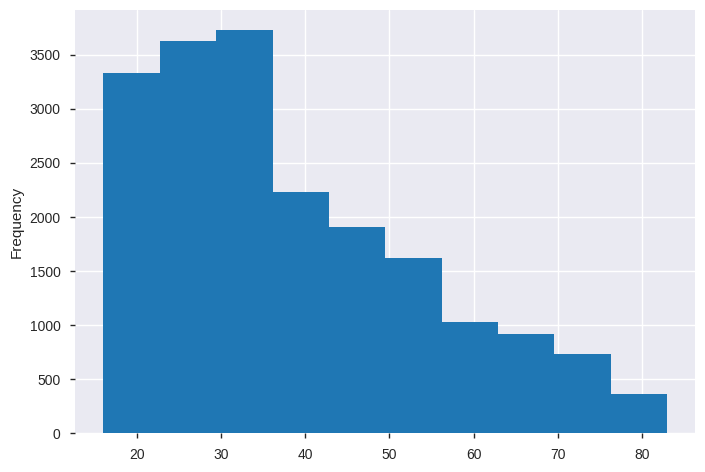

In [113]:
df1['respondent_age'].plot(kind="hist")


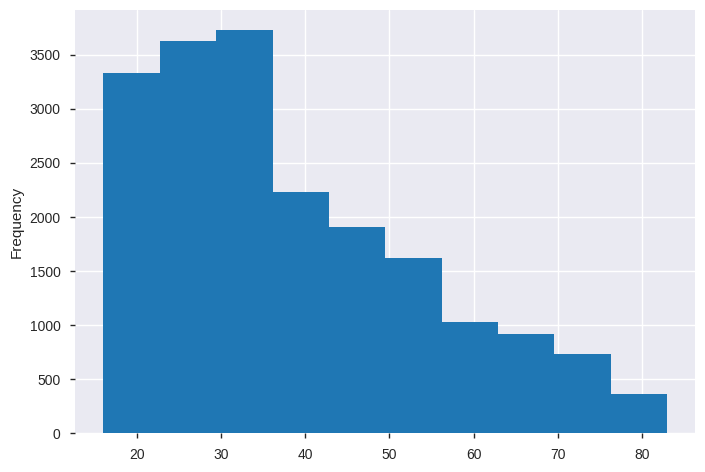

In [115]:
df1[df1['respondent_age'] < 100]['respondent_age'].plot.hist()


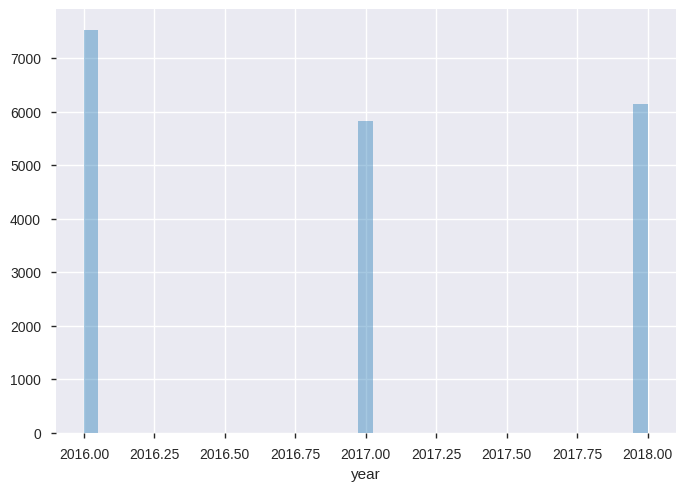

In [116]:
sns.distplot(df1.year.dropna(), kde=False, bins = 39);


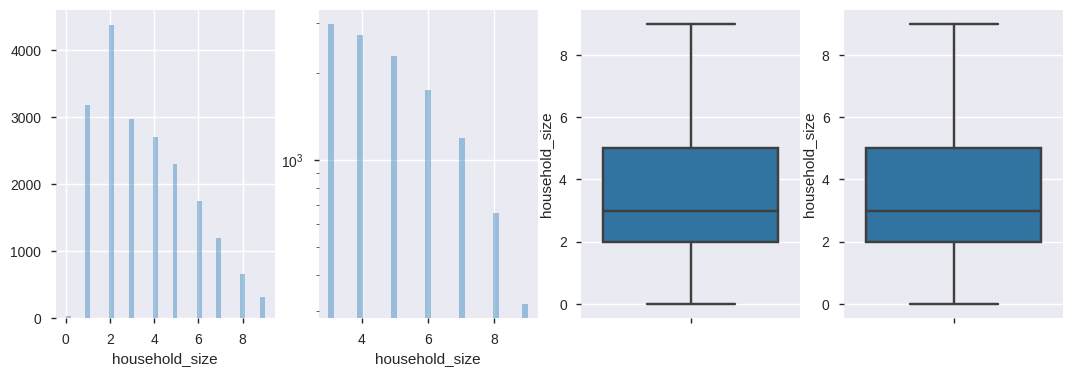

In [118]:

household_sizefig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(df1.household_size.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df1.household_size.dropna()[df1.household_size > 2], kde=False, ax=axs[1])
sns.boxplot(df1.household_size, ax=axs[2], orient = 'v')
sns.boxplot(df1.household_size, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

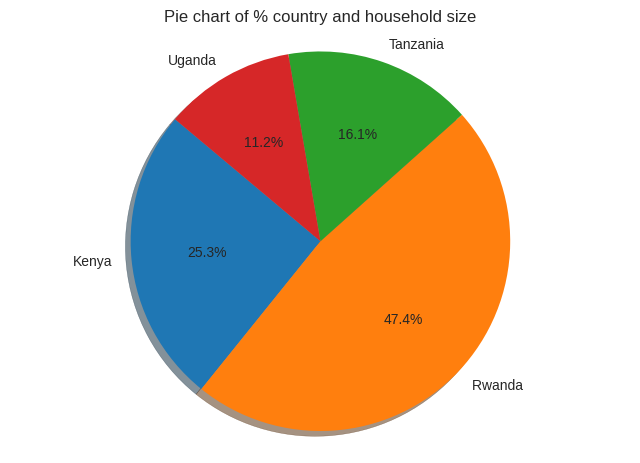

In [119]:
# Distribution of household sizes by count with country
x=df1.groupby('country')['household_size'].sum()
#.plot.pie()
labels=['Kenya','Rwanda ','Tanzania','Uganda']


explode=(0,0,0,0)
plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)


plt.axis('equal')
plt.title('Pie chart of % country and household size')
plt.show()

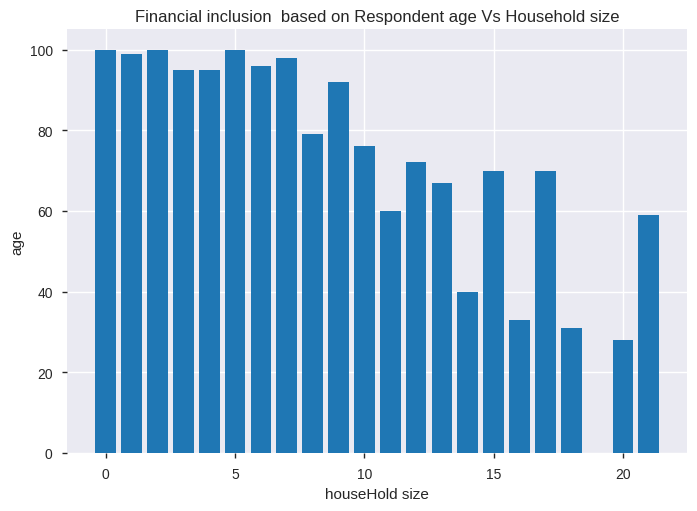

In [133]:
#plotting a histogram of financial inclusion based on responsent  age against  household size
plt.figure(dpi=100)
ff = df['household_size']
age = df["respondent_age"]
plt.bar(ff, age)
plt.ylabel("age")
plt.xlabel("houseHold size")
plt.title("Financial inclusion  based on Respondent age Vs Household size")
plt.show()


Text(0.5, 1.0, 'COUNTRY VS THE NUMBER OF HOUSEHOLD')

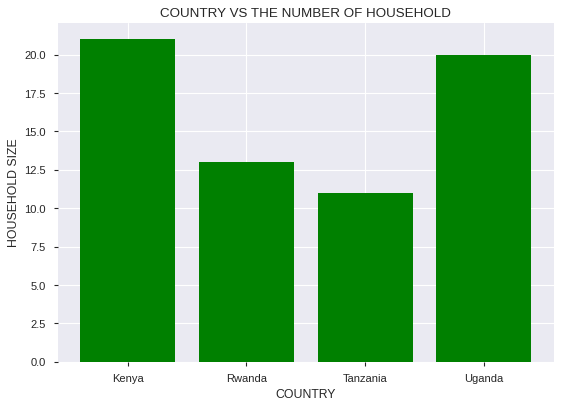

In [132]:

# distribustion of household sizes in  relation to countries and the household_size
# Defining our data
plt.figure(dpi=80)
country = df['country']
house =  df["household_size"]
plt.bar(country, house, color='green')
# Labelling our x axis
plt.xlabel("COUNTRY")
# Labelling our y axis
plt.ylabel("HOUSEHOLD SIZE")
# Giving a title to our Bar chart
plt.title("COUNTRY VS THE NUMBER OF HOUSEHOLD")
#bar(histXout, histFreq/sum(histFreq)*100);
# Displaying our
#From the  the histogram  that we have  the maximum household size was  around 21.5.
# Kenya was leading  withe the highes number of households  size of 21.5 it was then closely follwed  by Uganda.
# Tanzania was the one  that had least number of household size of around  11

In [129]:
df1_sample.columns

Index(['Unnamed: 0', 'country', 'year', 'bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age', 'gender',
       'relationship_with_head', 'marital_status', 'level_of_education',
       'type_job'],
      dtype='object')

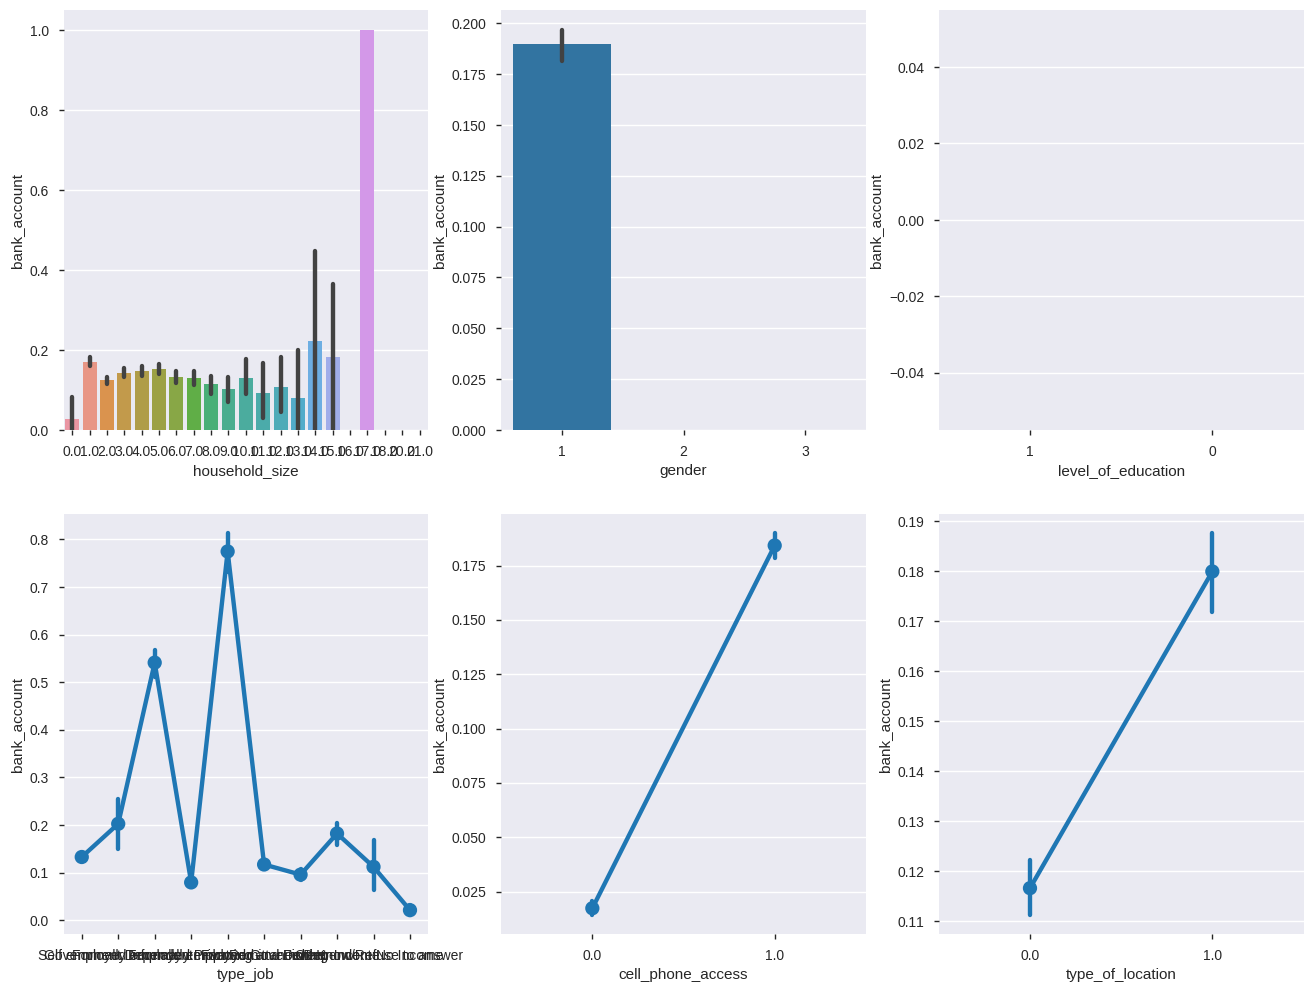

In [137]:
#we will use seaborn graphics for multi-variable comparison:

#graph individual features by Has Bank Account
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'household_size', y = 'bank_account', data=df, ax = saxis[0,0])
sns.barplot(x = 'gender', y = 'bank_account', order=[1,2,3], data=df, ax = saxis[0,1])
sns.barplot(x = 'level_of_education', y = 'bank_account', order=[1,0], data=df, ax = saxis[0,2])

sns.pointplot(x = 'type_job', y = 'bank_account',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'cell_phone_access', y = 'bank_account',  data=df, ax = saxis[1,1])
sns.pointplot(x = 'type_of_location', y = 'bank_account', data=df, ax = saxis[1,2])

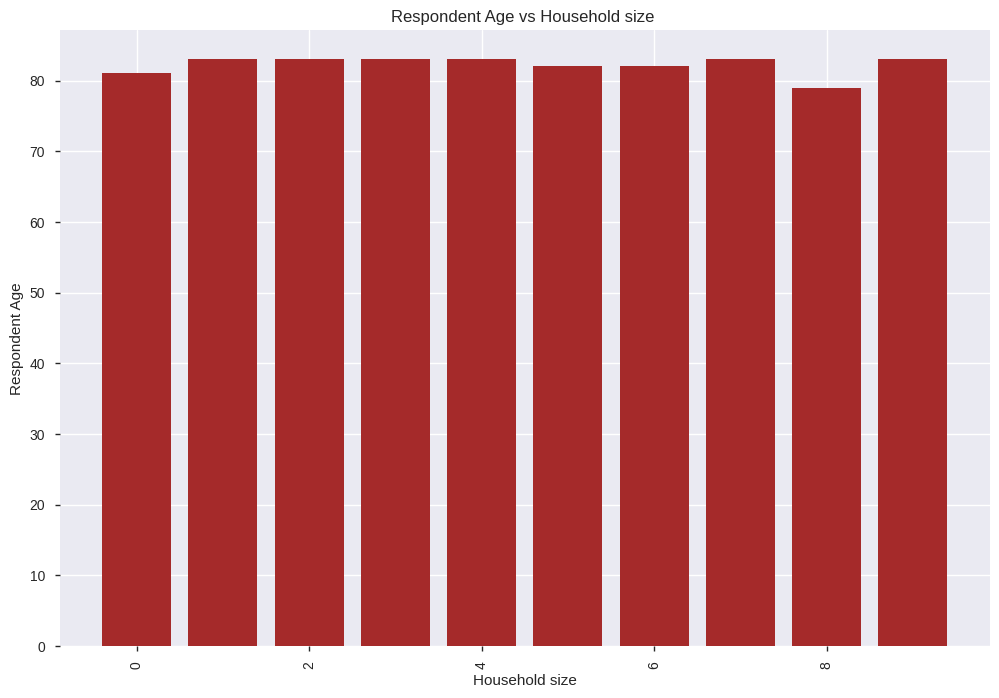

In [145]:

# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df1.household_size, df1.respondent_age, color='brown')
plt.xticks(rotation=90)
ax.set_xlabel('Household size')
ax.set_ylabel('Respondent Age')
plt.title('Respondent Age vs Household size ')
plt.show()

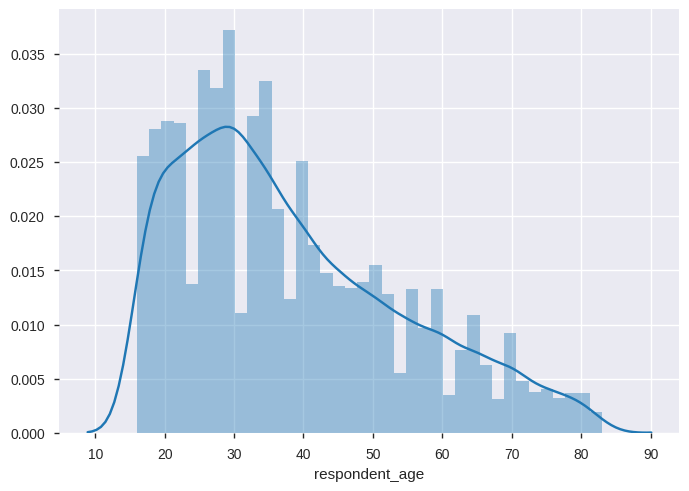

In [143]:
# Plotting a histogram of the respondent's ages
# proj['respondent_age'].hist()
#
sns.distplot(df1.respondent_age, kde = True)
# as the number respondent age increase its count decreases
# the highest count is between respondent age of 20 to 30
#his shows the smooth curve that tell as that as the respondent age increases the frequency decrease
#It means that the respondent age was positively skewed


# Bivariate analysis

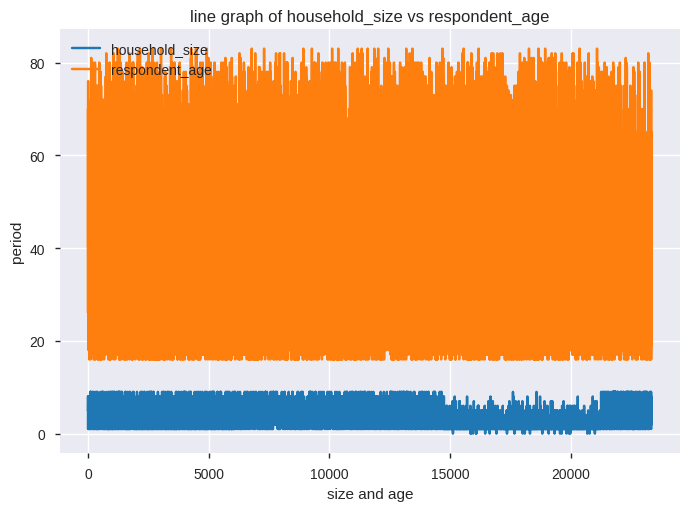

In [146]:

df1[['household_size','respondent_age']].plot()
plt.title('line graph of household_size vs respondent_age')
plt.xlabel('size and age')
plt.ylabel('period')
plt.show()

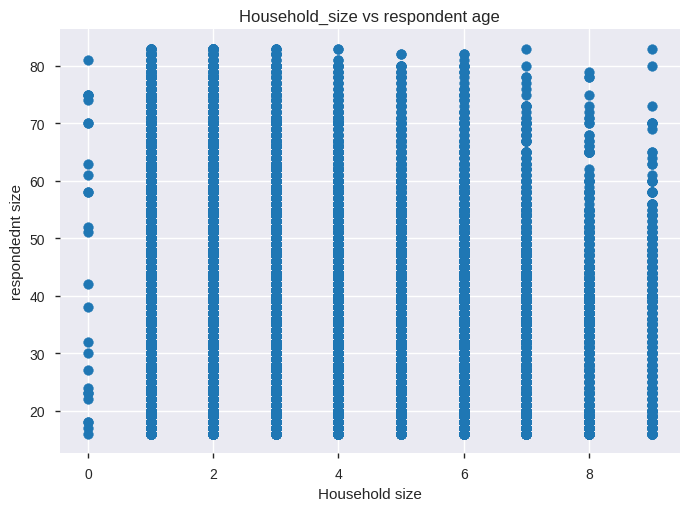

In [147]:
#Plotting our scatterplot to compare the variables
plt.scatter(df1['household_size'],df1['respondent_age'])


#title
plt.title('Household_size vs respondent age')
#labelling x axis
plt.xlabel('Household size')
plt.ylabel('respondednt size')
plt.show()



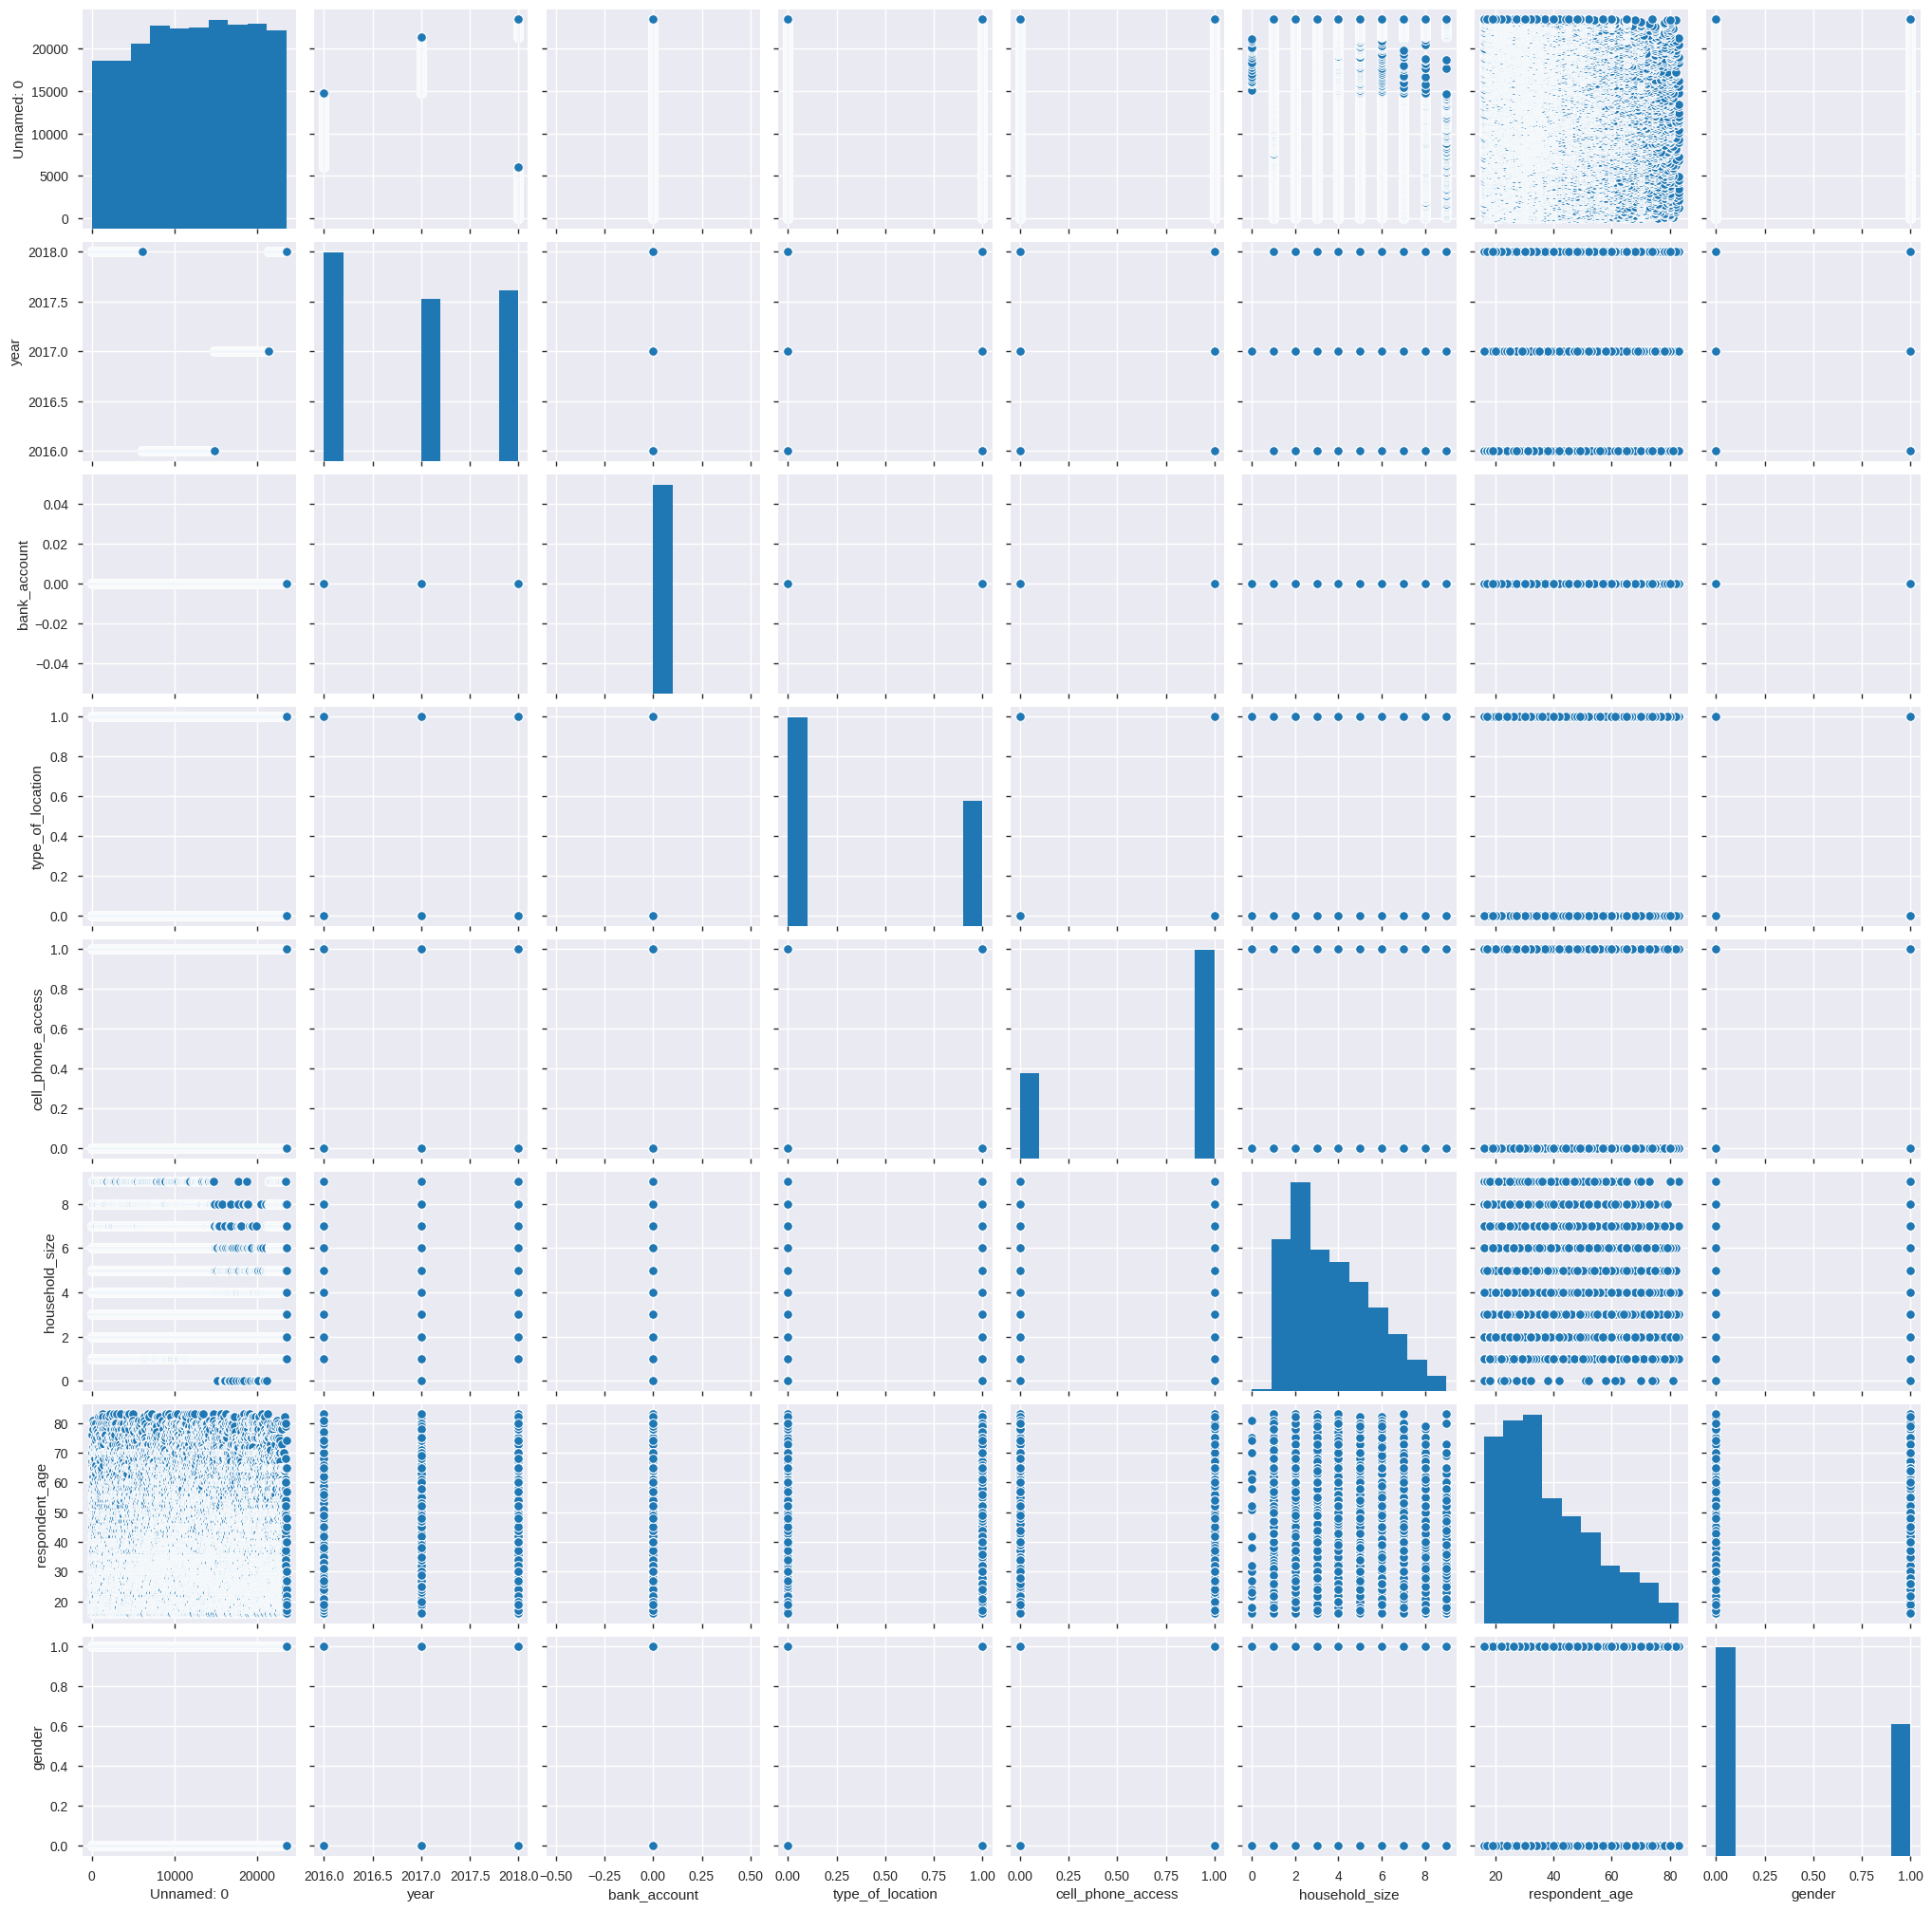

In [148]:
# Creating a pairplot to build histograms and scatter plots.
# ---
sns.pairplot(df1)
# The pair plot was build on two basic figures the histogram and scatter plot
#Histogram allowed me to view the distribution of variables.
# scatter plot allowed me to see res the relationship between the variables

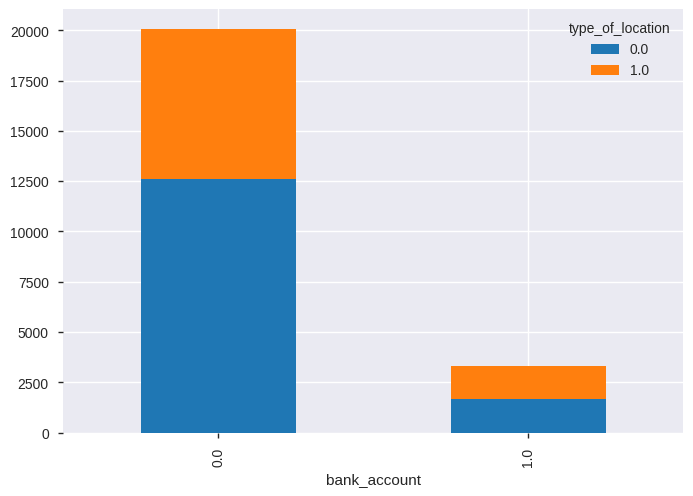

In [151]:
#Stacked bar plot with two-level group byPermalink

df1.groupby(['bank_account','type_of_location']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#From the stacked bar graph  there were people  without bank accounts and  a bigger portion was from rural areas
# Those that possed a bank account were almost the same in urban and rural areas

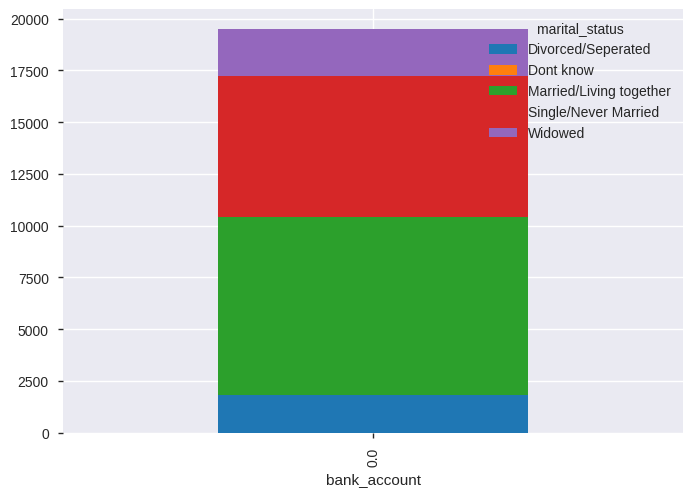

In [152]:
df1.groupby(['bank_account','marital_status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#In both Yes and No bank accounts married people were the one leading i n terms of  all those that contained the bank account followed by single  individuals 
# possibility are the number could also increase especial where we have respondent age approaching marriage.

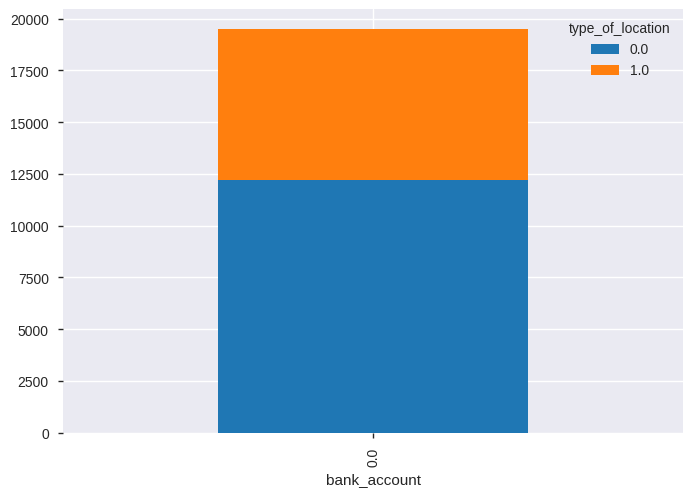

In [154]:
df1.groupby(['bank_account','type_of_location']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
# generally Urban areas were leading in terms of individuals who had bank account(marked in orange color)

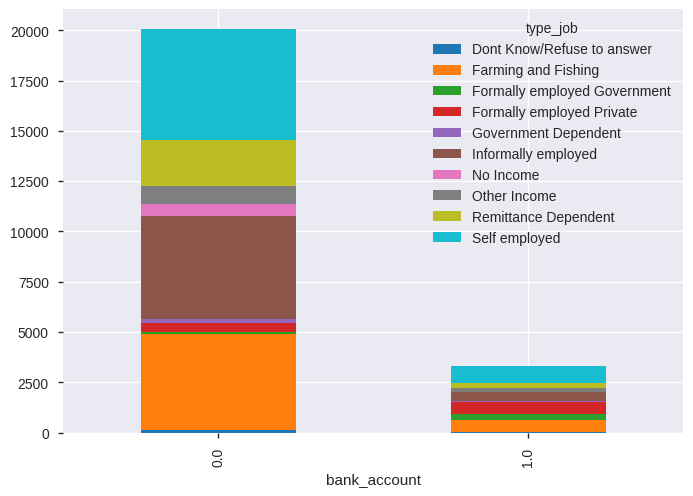

In [157]:
df.groupby(['bank_account','type_job']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#From the graph we can relate both the bank Accounts and job
#Many  of those who had bank accounts were farmers/fishers and self employmed
#Most of those who had bank account were self employed,formally employed private  and  those doing farming and fishing
# we can also note the In both individuals under yes  and No Formally employed private was almost equal.
#  Also based on Type of job ,Those who were  self employed,farmer and fisherers as well as those with remittance Dependent took a bigger proportion of those
#individuals  without bank account

In [155]:
df.columns

Index(['Unnamed: 0', 'country', 'year', 'bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age', 'gender',
       'relationship_with_head', 'marital_status', 'level_of_education',
       'type_job'],
      dtype='object')

In [158]:
#Correlation
#Correlation is a statistical measure that describes the association between random variables. 
#In this section, will use pandas to calculate the correlation coefficient. 
#We will calculate the pearson correlation coefficient which is the most widely used correlation coefficient.

 #Determine the relationship between the repondents age in relation  households sizes 
# Calculating the pearson coefficient
p_coeff = df1["respondent_age"].corr(df1["household_size"], method="pearson") 
print(p_coeff)

# Checking whether you have to define the pearson
coeff = df1["respondent_age"].corr(df1["household_size"]) 
print(coeff)
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# A negative (inverse) correlation occurs when the correlation coefficient is less than 0 
# and indicates that both variables(respondent age and househol sizea)  are known to move in the opposite direction. 
#-0.12409525840599211

# Since the correlation coefficent of household_sizeis and Respondent_age" is -0.12409525840599211
#, Respondent_age and 
# this means that  are moderately correlated.

-0.12409525840599211
-0.12409525840599211


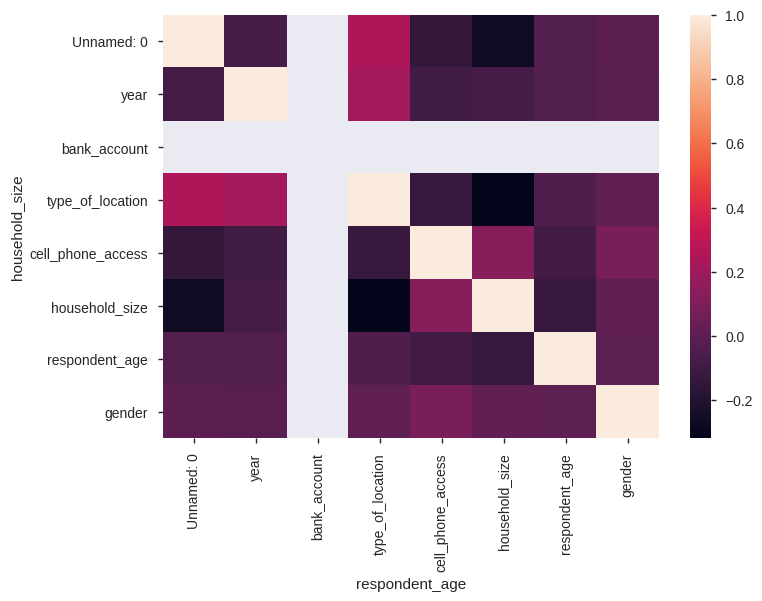

In [159]:
# Plotting the correlation using a heatmap.
# The dark colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.
# ---
plt.figure(dpi=100)

sns.heatmap(df1.corr())
plt.xlabel("respondent_age")
plt.ylabel("household_size")
plt.show()

# Multivariate Analysis

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [242]:
#Preprocessing
#Dividing my features into the feature set and corresponding labels: X and y respectively.
X = df.drop('bank_account', axis = 1)
y = df.iloc[:, 2]

In [243]:
#Create Dummy Variables to perform Principal Component Analysis easily and accurately with all the associated variable
X = pd.get_dummies(X)

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [245]:
#Standardisation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [246]:
#Training our model and Making predictions using 1 Principal component

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [247]:
y_pred = classifier.predict(X_test)


In [248]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2173    0    0]
 [   0 1690    0]
 [   0    0 1973]]
1.0


In [250]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
y_pred = classifier.predict(X_test)


In [252]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2173    0    0]
 [   0 1690    0]
 [   0    0 1973]]
1.0


In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print('The confusion matrix is',confusion_matrix(y_test, y_pred))
print('\n')
print('The accuracy score is',accuracy_score(y_test, y_pred))
print('\n')

#Explained Variance Ratio
print(pca.explained_variance_ratio_)

The confusion matrix is [[2123    0    0    0    0]
 [   0 1679    0    0    0]
 [   0    0 2033    0    0]
 [   0    0    0    0    0]
 [   0    0    0    1    0]]


The accuracy score is 0.9998286497601097


[9.94575543e-02 7.39565539e-02 6.98714344e-02 5.88112378e-02
 5.11061388e-02 4.66612660e-02 3.88661807e-02 3.70928875e-02
 3.30961524e-02 3.15858999e-02 2.76797423e-02 2.69435611e-02
 2.61891957e-02 2.60693346e-02 2.59128224e-02 2.58721501e-02
 2.55937860e-02 2.54203530e-02 2.50460076e-02 2.48159773e-02
 2.43133345e-02 2.35878330e-02 2.19502311e-02 2.05372909e-02
 1.93071952e-02 1.70775833e-02 1.54385918e-02 1.33203146e-02
 1.26048310e-02 1.14212023e-02 1.01033652e-02 8.20321889e-03
 1.34344822e-03 7.43324222e-04 1.96145441e-32 2.47296887e-33
 1.99515870e-33 1.23772442e-33 4.20291606e-34]


In [254]:
len(X.columns)


39

In [256]:
import warnings
warnings.filterwarnings("ignore")

accuracy = []

for i in range(1, 39):

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  
  accuracy.append(accuracy_score(y_test, y_pred))

#print(confusion_matrix(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))
#print(pca.explained_variance_ratio_)'''

accuracy

[0.7625085675119945,
 0.8457847840986977,
 0.9508224811514736,
 0.9953735435229609,
 0.9965729952021933,
 0.998457847840987,
 0.9991432488005483,
 0.9993145990404386,
 0.9993145990404386,
 1.0,
 0.9996572995202193,
 0.9998286497601097,
 0.9996572995202193,
 0.999485949280329,
 0.999485949280329,
 0.999485949280329,
 0.999485949280329,
 0.9996572995202193,
 0.9998286497601097,
 0.9996572995202193,
 0.9996572995202193,
 0.9998286497601097,
 1.0,
 1.0,
 0.9996572995202193,
 0.9998286497601097,
 0.9998286497601097,
 0.9998286497601097,
 1.0,
 0.9998286497601097,
 1.0,
 0.9998286497601097,
 0.9998286497601097,
 0.9998286497601097,
 0.9996572995202193,
 1.0,
 1.0,
 0.9998286497601097]

In [257]:
X.columns


Index(['Unnamed: 0', 'year', 'type_of_location', 'cell_phone_access',
       'household_size', 'respondent_age', 'gender', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Specialised training',
       'type_

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 39)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
  
accuracy.append(accuracy_score(y_test, y_pred))